In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import scipy.optimize as opt

In [6]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

match_bisection = []
match_newton = []
# Bisection算法
def bisection(f, a, b, epsilon):
    match_bisection.clear()
    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        match_bisection.append(c)
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Newton算法
def newton(f, df, x0, epsilon):
    x = x0
    match_newton.clear()
    while abs(f(x)) > epsilon:
        match_newton.append(x)
        x = x - f(x) / df(x)
    return x

# 求根函数
def spicy(func, a, b):
    result = opt.root_scalar(func, bracket=[a, b], method='brentq')
    return result.root

定义函数及其导数

In [7]:
#定义f1(x)
a1, b1 = -0.2, 1.4
epsilon1 = 1e-10
def f1(x):
    return 2 * x - np.tan(x)
def df1(x):
    return 2 - 1 / (np.cos(x) ** 2)

#定义f2(x)
a2, b2 = -2, 2
epsilon2 = 1e-10
def f2(x):
    return np.exp(x + 1) - 2 - x
def df2(x):
    return np.exp(x + 1) - 1

#定义f3(x)
a3, b3 = 0.5, 4 * np.pi
epsilon3 = 1e-10
def f3(x):
    return x ** (-2) - np.sin(x)
def df3(x):
    return -2 * x ** (-3) - np.cos(x)
epsilon=1e-10

绘制图像从而估计根的数量和范围

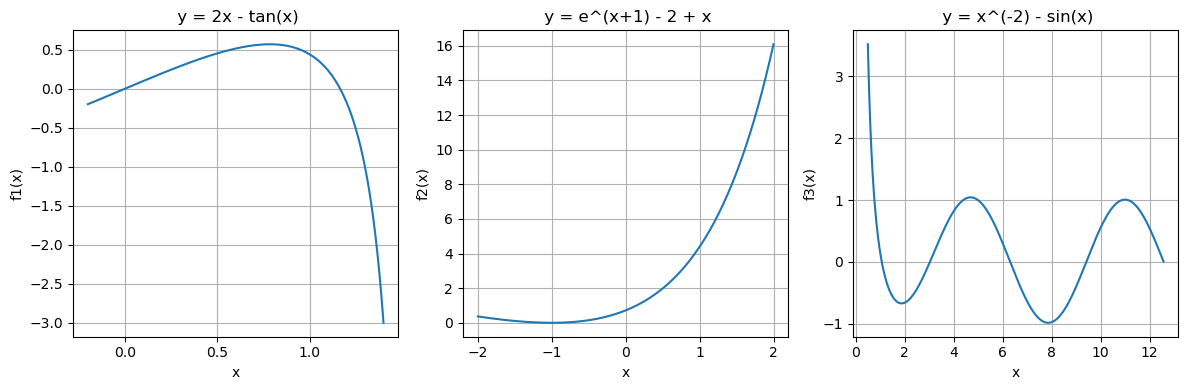

In [8]:
# 函数1的图像
plt.figure(figsize=(12, 4))
x_values = np.linspace(a1, b1, 1000)
plt.subplot(131)
plt.plot(x_values, f1(x_values), label='2x - tan(x)')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.title(' y = 2x - tan(x)')
plt.grid()

# 函数2的图像
x_values = np.linspace(a2, b2, 1000)
plt.subplot(132)
plt.plot(x_values, f2(x_values), label='e^(x+1) - 2 - x')
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title(' y = e^(x+1) - 2 + x')
plt.grid()

# 函数3的图像
x_values = np.linspace(a3, b3, 1000)
plt.subplot(133)
plt.plot(x_values, f3(x_values), label='x^(-2) - sin(x)')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.title(' y = x^(-2) - sin(x)')
plt.grid()

plt.tight_layout()
plt.show()

从图像估计根的范围

In [9]:
root = []
# 函数1的根
roots1 = [(-0.2, 0.5),(1.0, 1.4)]
root.append(('Function 1', roots1))

# 函数2的根
roots2 = [(-2, 0)]
root.append(('Function 2', roots2))

# 函数3的根
roots3 = [(0.5, 2),(2, 4),(6, 8),(8, 10)]
root.append(('Function 3', roots3))

In [10]:
roots1_bisection = []
for interval in roots1:
    root=bisection(f1, interval[0], interval[1], epsilon)
    roots1_bisection.append(root)

print(f'Bisection_roots f1: {roots1_bisection}')

roots1_newton = [] 
for interval in roots1:
    x0 = (interval[0] + interval[1]) / 2
    root = newton(f1, df1, x0, epsilon)
    roots1_newton.append(root)
    
print(f'Newton_roots f1: {roots1_newton}')

roots1_scipy = []
for interval in roots1:
    root = spicy(f1, interval[0], interval[1])
    roots1_scipy.append(root)

print(f'Scipy_roots f1: {roots1_scipy}')

Bisection_roots f1: [5.8207652983302947e-11, 1.1655611851252616]
Newton_roots f1: [0.0, 1.1655611852072116]
Scipy_roots f1: [-6.208381588204088e-17, 1.1655611852072105]


In [11]:
roots2_bisection = []
for interval in roots2:
    root=bisection(f2, interval[0], interval[1], epsilon)
    roots2_bisection.append(root)

print(f'Bisection_roots f2: {roots2_bisection}')

roots2_newton = [] 
for interval in roots2:
    x0 = (interval[0] + interval[1]) / 2
    root = newton(f2, df2, x0, epsilon)
    roots2_newton.append(root)
    
print(f'Newton_roots f2: {roots2_newton}')

roots2_scipy = []
for interval in roots2:
    try:
        roots2_scipy.append(spicy(f2, interval[0], interval[1]))
    except ValueError as error:
        roots2_scipy.append( ''+ f'Error: {error}')
print(f'Scipy_roots f1: {roots2_scipy}')

Bisection_roots f2: [-1.0]
Newton_roots f2: [-1.0]
Scipy_roots f1: ['Error: f(a) and f(b) must have different signs']


In [12]:
roots3_bisection = []
for interval in roots3:
    root=bisection(f3, interval[0], interval[1], epsilon)
    roots3_bisection.append(root)

print(f'Bisection_roots f2: {roots3_bisection}')

roots3_newton = [] 
for interval in roots3:
    x0 = (interval[0] + interval[1]) / 2
    root = newton(f3, df3, x0, epsilon)
    roots3_newton.append(root)
    
print(f'Newton_roots f2: {roots3_newton}')

roots3_scipy = []
for interval in roots3:
    try:
        roots3_scipy.append(spicy(f3, interval[0], interval[1]))
    except ValueError as error:
        roots3_scipy.append( ''+ f'Error: {error}')
print(f'Scipy_roots f1: {roots3_scipy}')

Bisection_roots f2: [1.068223544250941, 3.032645418366883, 6.308316825248767, 9.413492803170811]
Newton_roots f2: [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.413492803170124]
Scipy_roots f1: [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.4134928031701]


误差分析

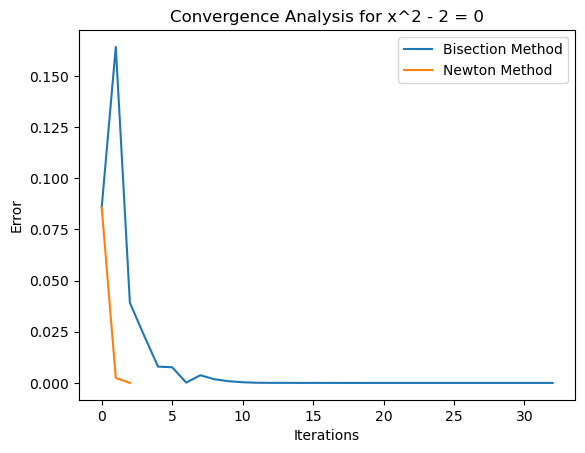

In [22]:


# 定义需要求解的函数
def f4(x):
     return x**2 - 2

def df4(x):
    return 2 * x
plt.plot(np.abs(match_bisection - np.sqrt(2)), label='Bisection Method')
plt.plot(np.abs(match_newton - np.sqrt(2)), label='Newton Method')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Convergence Analysis for x^2 - 2 = 0')
plt.legend()
plt.show()
